# 函数式编程 
# 四个函数map/reduce filter sorted
## 纯粹式函数式编程语言编写的函数没有变量

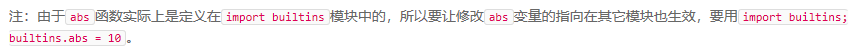

# 一个函数的参数为函数 即高阶函数

In [1]:
def su(a,b,func):
    print(func(a)+func(b))

In [3]:
su(1,-2,abs)

3


In [4]:
# map函数有两个参数 一个是函数 一个是Iterable
# map函数将传入函数依次作用于每一个序列元素
# 返回的是Iterator (注意返回值类型)

def f(x):
    return x*x

square = map(f , [1,2,3,4])

In [5]:
square

In [6]:
from collections import Iterator

In [7]:
isinstance(square , Iterator) #map是Iterator

True

In [8]:
list(square) #Iterator变为list 因为Iterator为惰性序列 强迫完成计算结果 使用list获得所有结果

[1, 4, 9, 16]

In [9]:
next(square)

StopIteration: 

In [10]:
for i in square:
    print(i)

In [11]:
from functools import reduce
'''
reduce将结果继续与接下来的元素进行计算
'''
def add(x,y):
    return x+y

reduce(add , [1,2,3,4,5])

15

In [13]:
def fn(x,y):
    return x*10 + y

#拼接为一个数字
reduce(fn , [1,2,3,4,5])

12345

In [16]:
#使用map-reduce实现str转为int的函数
def fn(x,y):
    return x*10+y

def char2int(s):
    table={'1':1,'2':2,'3':3}
    return table[s]

reduce(fn , map(char2int , '23'))

23

In [21]:
# filter函数也是将函数作用于序列元素上
# 根据函数的返回值 判断是否保留函数值
def is_odd(number):
    return number%2 == 1 #保存奇数 删除偶数

tt = filter(is_odd , [1,2,3,4,5,6,7,8,9,10])

In [22]:
print(tt)

In [23]:
isinstance(tt , Iterator) #还是一个Iterator

True

In [24]:
list(tt)

[1, 3, 5, 7, 9]

In [27]:
# 埃氏筛法
def _odd_iter():
    n=1
    
    while True:
        n=n+2
        yield n
    
def _not_divisible(n):
    '''
    此函数返回函数
    '''
    return lambda x: x%n > 0

def primes():
    yield 2
    
    it = _odd_iter() #初始化序列
    
    while True:
        n = next(it)
        yield n
        
        it = filter(_not_divisible(n) , it)
        
    
for n in primes():
    if n<100:
        print(n)
    else:
        break

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97


In [29]:
sorted([3,2,1,4,4,5,6]) #升序排序 字符串默认按照ascii进行排序

[1, 2, 3, 4, 4, 5, 6]

In [32]:
sorted([2,3,4,3,2,1,12,3,234,2,12,1,2,3,-1,2,-5,-123] , key=abs) #按照绝对值进行排序(升序)

[1, 1, -1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, -5, 12, 12, -123, 234]

In [35]:
sorted([2,3,4,3,2,1,12,3,234,2,12,1,2,3,-1,2,-5,-123] , key=abs , reverse=True) #按照绝对值进行排序（降序）

[234, -123, 12, 12, -5, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, -1]